# PINT Residuals Plots

### The Average residuals from the PINT data are plotted for average locations with a linear scaling factor. 

#### Read into the PINT Averages Dataframe from the PINTGroupingTbl.ipynb file.

In [1]:
import pandas as pd 

data = pd.read_pickle("PINT_AvgGroups.pkl")

data["AvgLat"] = pd.to_numeric(data["AvgLat"]) #convert AvgLat values from dtype objects to float64 
data["AvgLong"] = pd.to_numeric(data["AvgLong"]) #convert AvgLong values from dtype objects to float64 

data

SITE INFO:,SLAT,SLONG,P,VADMAvg,VADMStdv,VADMStdvWeighted,AvgLat,AvgLong,AvgF,StdvF,GroupAmount,AgeRange,MinAge of Group,MaxAge of Group,Residual,Residual/stdv,ResidualWeighted
29,-77.45700,166.91000,N,4.284487,2.276409,0.415614,-78.011847,165.072427,32.48,17.232593,30,2.245,0.055,2.3,-2.928612,-1.286505,-7.046478
31,-54.00000,3.50000,N,5.663969,0.554576,0.392144,-54.348510,1.269173,37.7,3.8,2,0.15,0.15,0.3,-1.54913,-2.793362,-3.95041
43,-36.77000,174.89000,N,5.962385,2.386675,0.688974,-38.605329,175.394313,33.891667,13.67927,12,0.86,0.14,1.0,-1.250714,-0.52404,-1.815329
46,-37.60000,143.90000,N,11.255789,0.862051,0.497705,-37.666607,144.199458,63.166667,4.828618,3,0.0,2.25,2.25,4.04269,4.68962,8.12266
48,-36.00000,-71.00000,N,7.118135,1.336355,0.944946,-36.000000,-71.000000,39.15,7.35,2,0.016,0.784,0.8,-0.094964,-0.071062,-0.100496
55,-29.00000,167.80000,N,8.779671,1.945237,0.73523,-29.000000,167.800000,44.185714,9.789853,7,0.0,2.73,2.73,1.566572,0.805337,2.130722
115,-20.20000,57.30000,N,8.775386,2.569278,0.331692,-20.959899,55.590437,39.793333,11.66786,60,1.777,0.073,1.85,1.562286,0.608064,4.710046
161,-16.44000,-152.25000,N,4.669377,2.84668,0.41972,-16.873026,-151.137151,20.128261,12.245259,46,4.1,0.51,4.61,-2.543723,-0.893575,-6.060522
175,19.37530,-102.98300,N,6.385503,3.396411,1.283723,15.073878,-103.418606,27.8,15.620408,7,3.467,0.061,3.528,-0.827597,-0.243668,-0.644685
191,16.10000,-61.80000,N,5.847132,1.909023,0.674942,16.012497,-61.712495,24.975,8.151495,8,0.708,0.077,0.785,-1.365967,-0.715532,-2.02383


#### Round weighted residuals to a single decimal point. Create seperate tables for positive and negative residual values. 

#### For ease of plotting, create a new column to take the absolute value of the negative residuals. 

In [2]:
import numpy as np 

data["RW_rd"] = data.ResidualWeighted  #copies the values from the ResidualsWeighted to a new column

# Rounds values in new RW_rd column to 1 decimal point
decimals = 1    
data['RW_rd'] = data['RW_rd'].apply(lambda x: round(x, decimals))

RW_pos = data[data.RW_rd >= 0] # new table only with data that has positive (greater than 0) residuals
RW_neg = data[data.RW_rd <= 0] # new table only with data that has negative (less than 0) residuals

RW_neg['RW_rd_abs'] = np.absolute(RW_neg.RW_rd) #takes abs value of negative residuals 
RW_neg

C:\Users\trin\AppData\Local\Temp/ipykernel_3212/1530972958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RW_neg['RW_rd_abs'] = np.absolute(RW_neg.RW_rd) #takes abs value of negative residuals


SITE INFO:,SLAT,SLONG,P,VADMAvg,VADMStdv,VADMStdvWeighted,AvgLat,AvgLong,AvgF,StdvF,GroupAmount,AgeRange,MinAge of Group,MaxAge of Group,Residual,Residual/stdv,ResidualWeighted,RW_rd,RW_rd_abs
29,-77.45700,166.91000,N,4.284487,2.276409,0.415614,-78.011847,165.072427,32.48,17.232593,30,2.245,0.055,2.3,-2.928612,-1.286505,-7.046478,-7.0,7.0
31,-54.00000,3.50000,N,5.663969,0.554576,0.392144,-54.348510,1.269173,37.7,3.8,2,0.15,0.15,0.3,-1.54913,-2.793362,-3.95041,-4.0,4.0
43,-36.77000,174.89000,N,5.962385,2.386675,0.688974,-38.605329,175.394313,33.891667,13.67927,12,0.86,0.14,1.0,-1.250714,-0.52404,-1.815329,-1.8,1.8
48,-36.00000,-71.00000,N,7.118135,1.336355,0.944946,-36.000000,-71.000000,39.15,7.35,2,0.016,0.784,0.8,-0.094964,-0.071062,-0.100496,-0.1,0.1
161,-16.44000,-152.25000,N,4.669377,2.84668,0.41972,-16.873026,-151.137151,20.128261,12.245259,46,4.1,0.51,4.61,-2.543723,-0.893575,-6.060522,-6.1,6.1
175,19.37530,-102.98300,N,6.385503,3.396411,1.283723,15.073878,-103.418606,27.8,15.620408,7,3.467,0.061,3.528,-0.827597,-0.243668,-0.644685,-0.6,0.6
191,16.10000,-61.80000,N,5.847132,1.909023,0.674942,16.012497,-61.712495,24.975,8.151495,8,0.708,0.077,0.785,-1.365967,-0.715532,-2.02383,-2.0,2.0
595,21.00000,158.00000,N,4.16796,0.728092,0.325613,20.654468,157.394829,18.84,3.369035,5,3.4862,0.0938,3.58,-3.045139,-4.182353,-9.352026,-9.4,9.4
606,28.80000,-17.77000,N,4.151158,2.957444,0.891703,28.764529,-17.816406,20.818182,14.818589,11,0.005,0.785,0.79,-3.061942,-1.035334,-3.433813,-3.4,3.4
641,37.70000,-118.90000,N,5.046006,2.365954,0.399919,32.471884,-116.254197,26.971429,13.722361,35,4.016,0.064,4.08,-2.167093,-0.915949,-5.418826,-5.4,5.4


#### Set the region of the plot to be slightly larger than data bounds

In [3]:
import pygmt

region = [
    data.AvgLong.min() - 1,
    data.AvgLong.max() + 1,
    data.AvgLat.min() - 1,
    data.AvgLat.max() + 1,
]

print(region)
print(data.head())

[-156.2616562337661, 176.39431338726797, -79.01184685605986, 71.909515743127]
SITE INFO:    SLAT   SLONG  P    VADMAvg  VADMStdv VADMStdvWeighted  \
29         -77.457  166.91  N   4.284487  2.276409         0.415614   
31         -54.000    3.50  N   5.663969  0.554576         0.392144   
43         -36.770  174.89  N   5.962385  2.386675         0.688974   
46         -37.600  143.90  N  11.255789  0.862051         0.497705   
48         -36.000  -71.00  N   7.118135  1.336355         0.944946   

SITE INFO:     AvgLat     AvgLong       AvgF      StdvF GroupAmount AgeRange  \
29         -78.011847  165.072427      32.48  17.232593          30    2.245   
31         -54.348510    1.269173       37.7        3.8           2     0.15   
43         -38.605329  175.394313  33.891667   13.67927          12     0.86   
46         -37.666607  144.199458  63.166667   4.828618           3      0.0   
48         -36.000000  -71.000000      39.15       7.35           2    0.016   

SITE INFO: Min

#### Plot the average locations

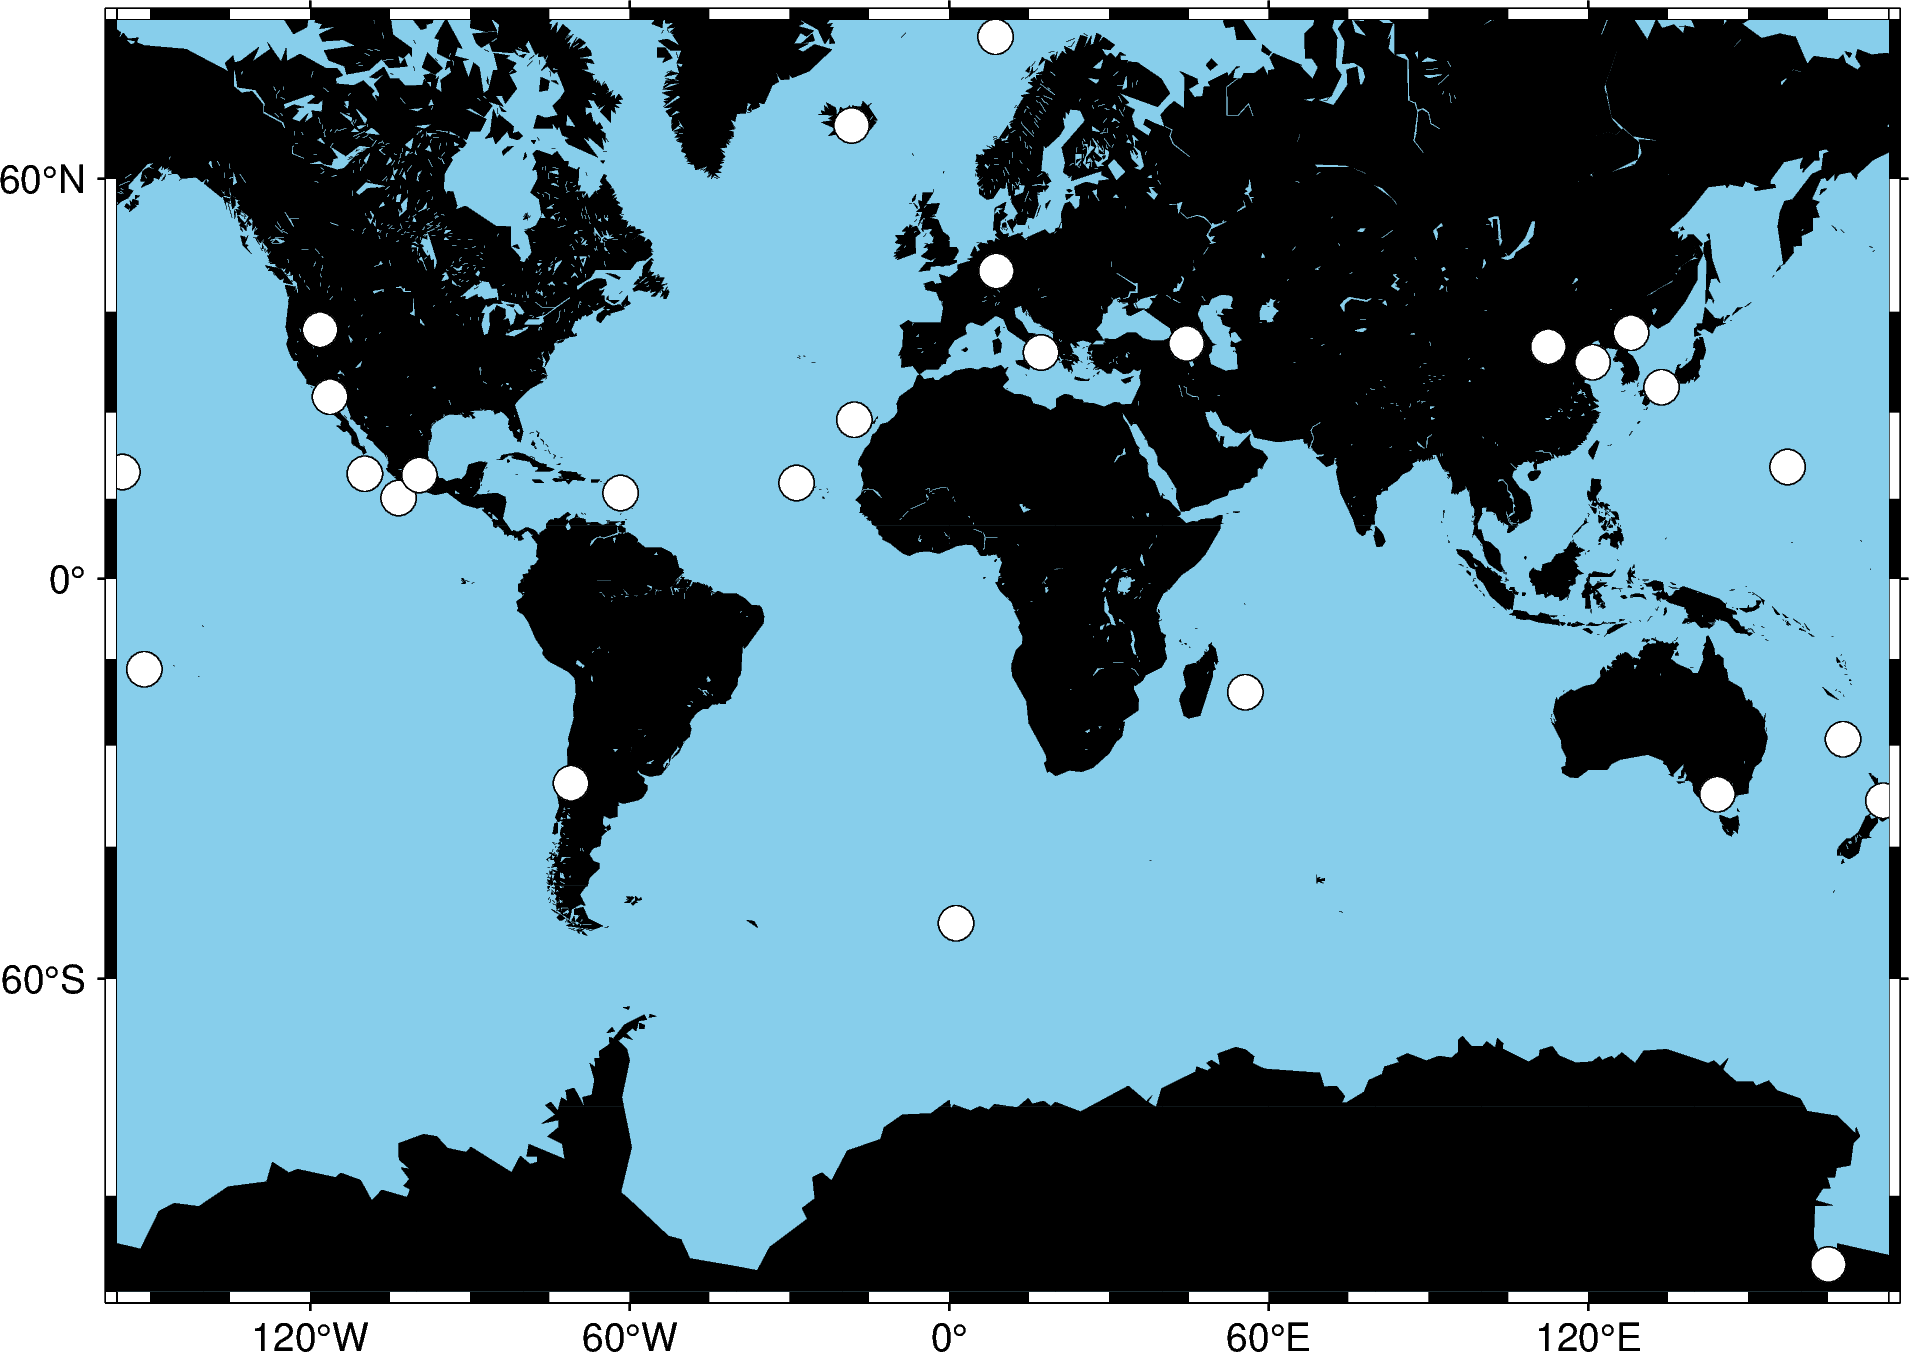

In [4]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
fig.plot(x=data.AvgLong, y=data.AvgLat, style="c0.3c", color="white", pen="black")
fig.show()

#### Using the plus symbol, plot for the positive weighted residuals of the average locations. 

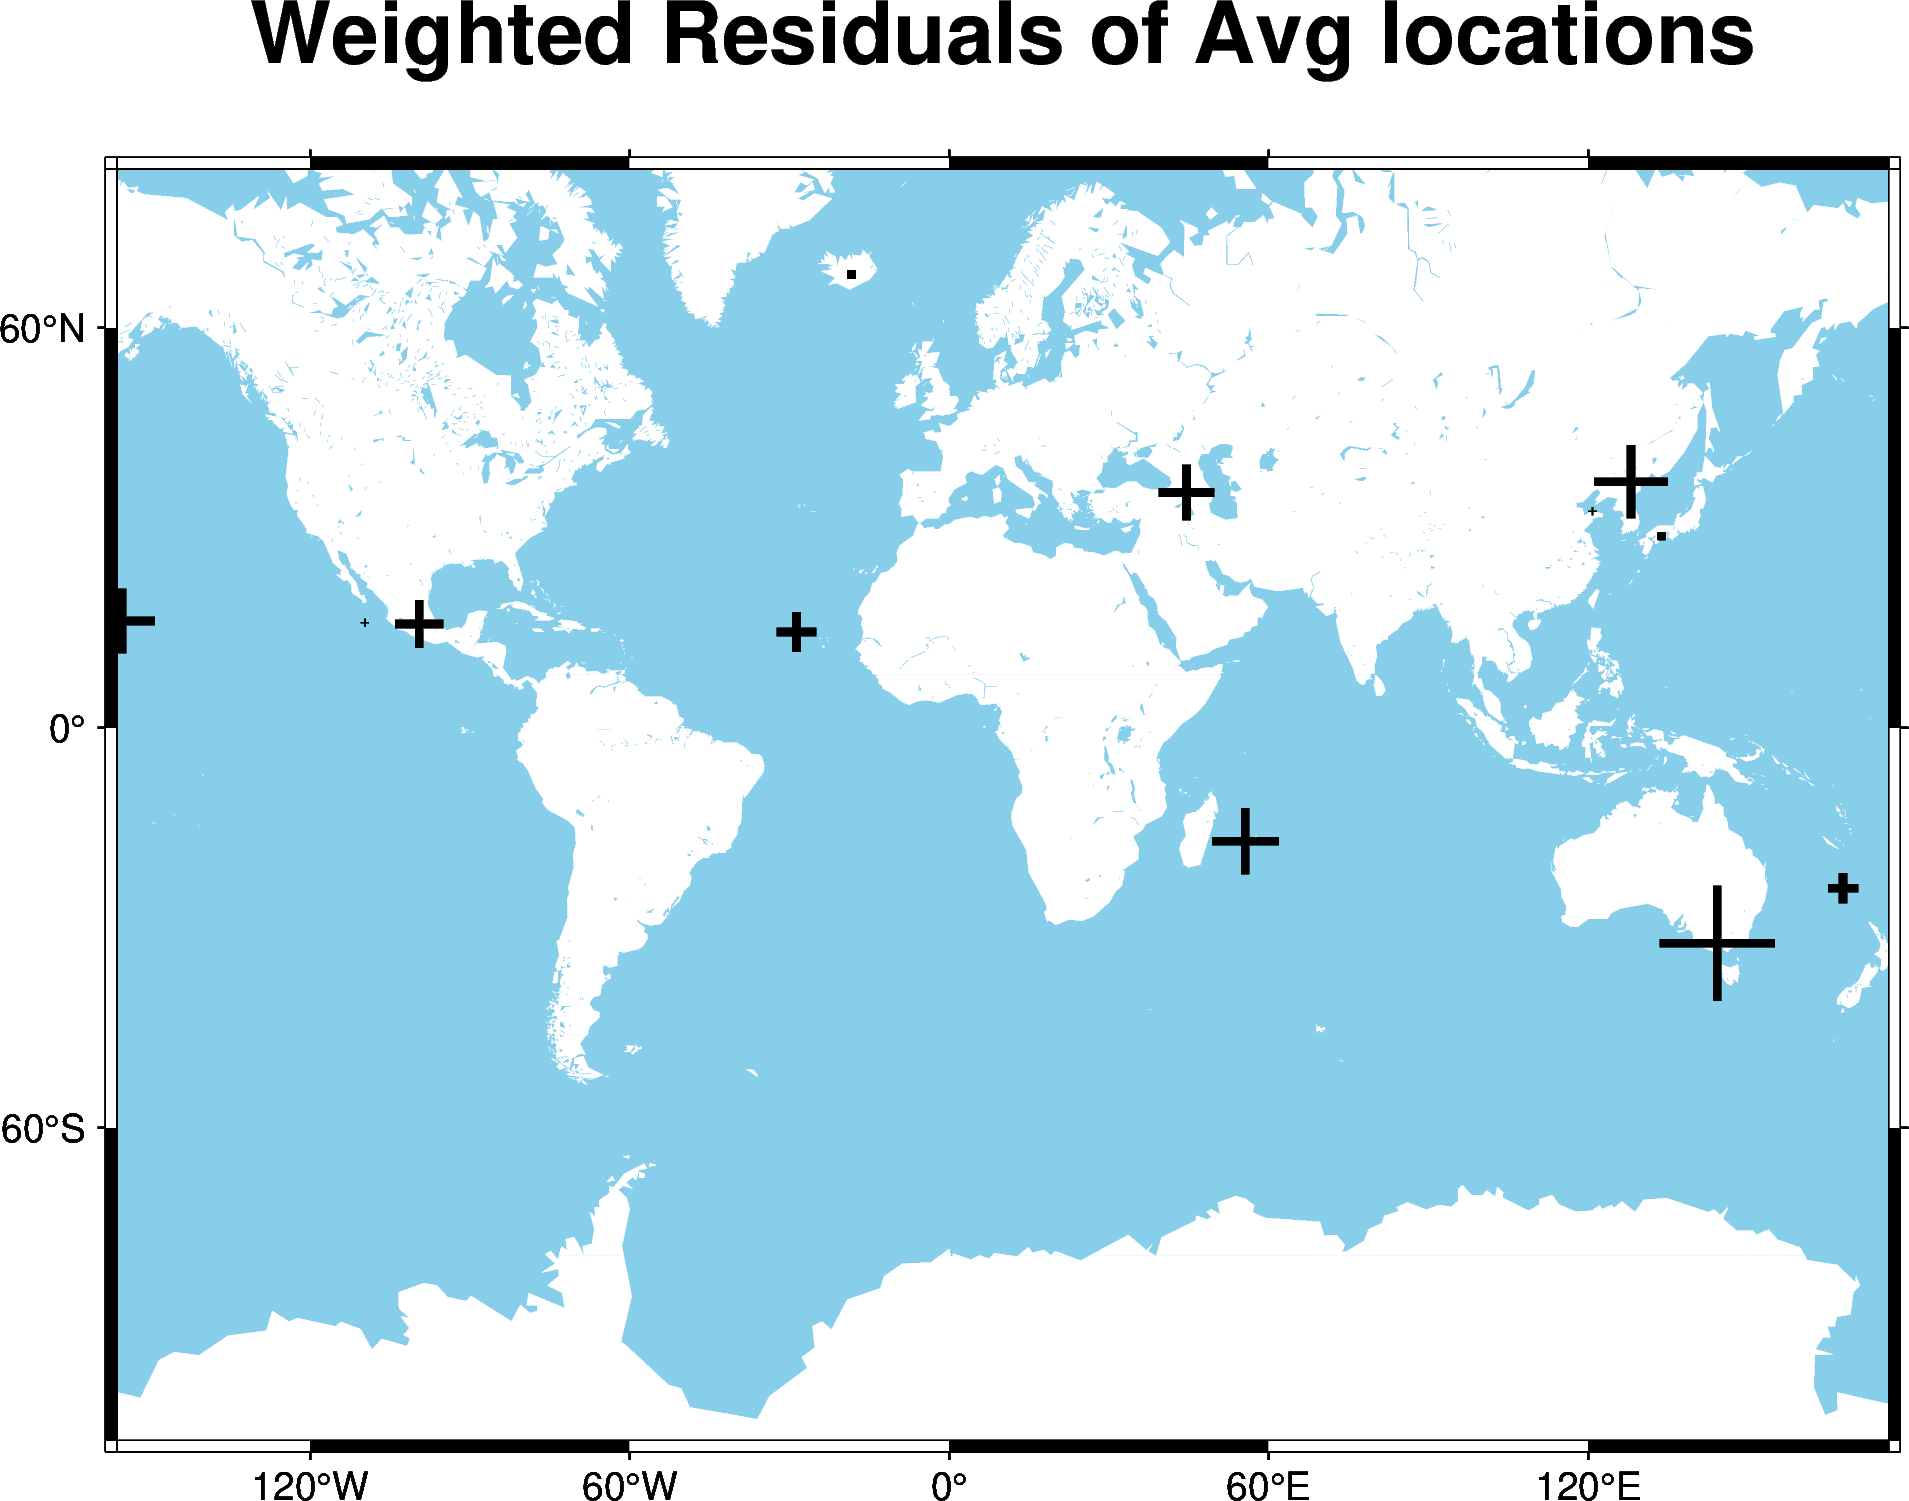

In [5]:
import numpy as np
import matplotlib as plt

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame =True)
fig.coast(land="white", water="skyblue")
fig.plot(
   x=RW_pos.AvgLong,
   y=RW_pos.AvgLat, 
   size=0.03 * (4* RW_pos.RW_rd),
   style="+cc",
   pen="2p,black",
)
fig.basemap(frame=["a", '+t" Weighted Residuals of Avg locations"'])

fig.show()

#fig.savefig('../figs/' + 'residualscaling_positive.png', dpi=160)

#### Using the open circle symbol, plot for the negative weighted residuals of the average locations. 

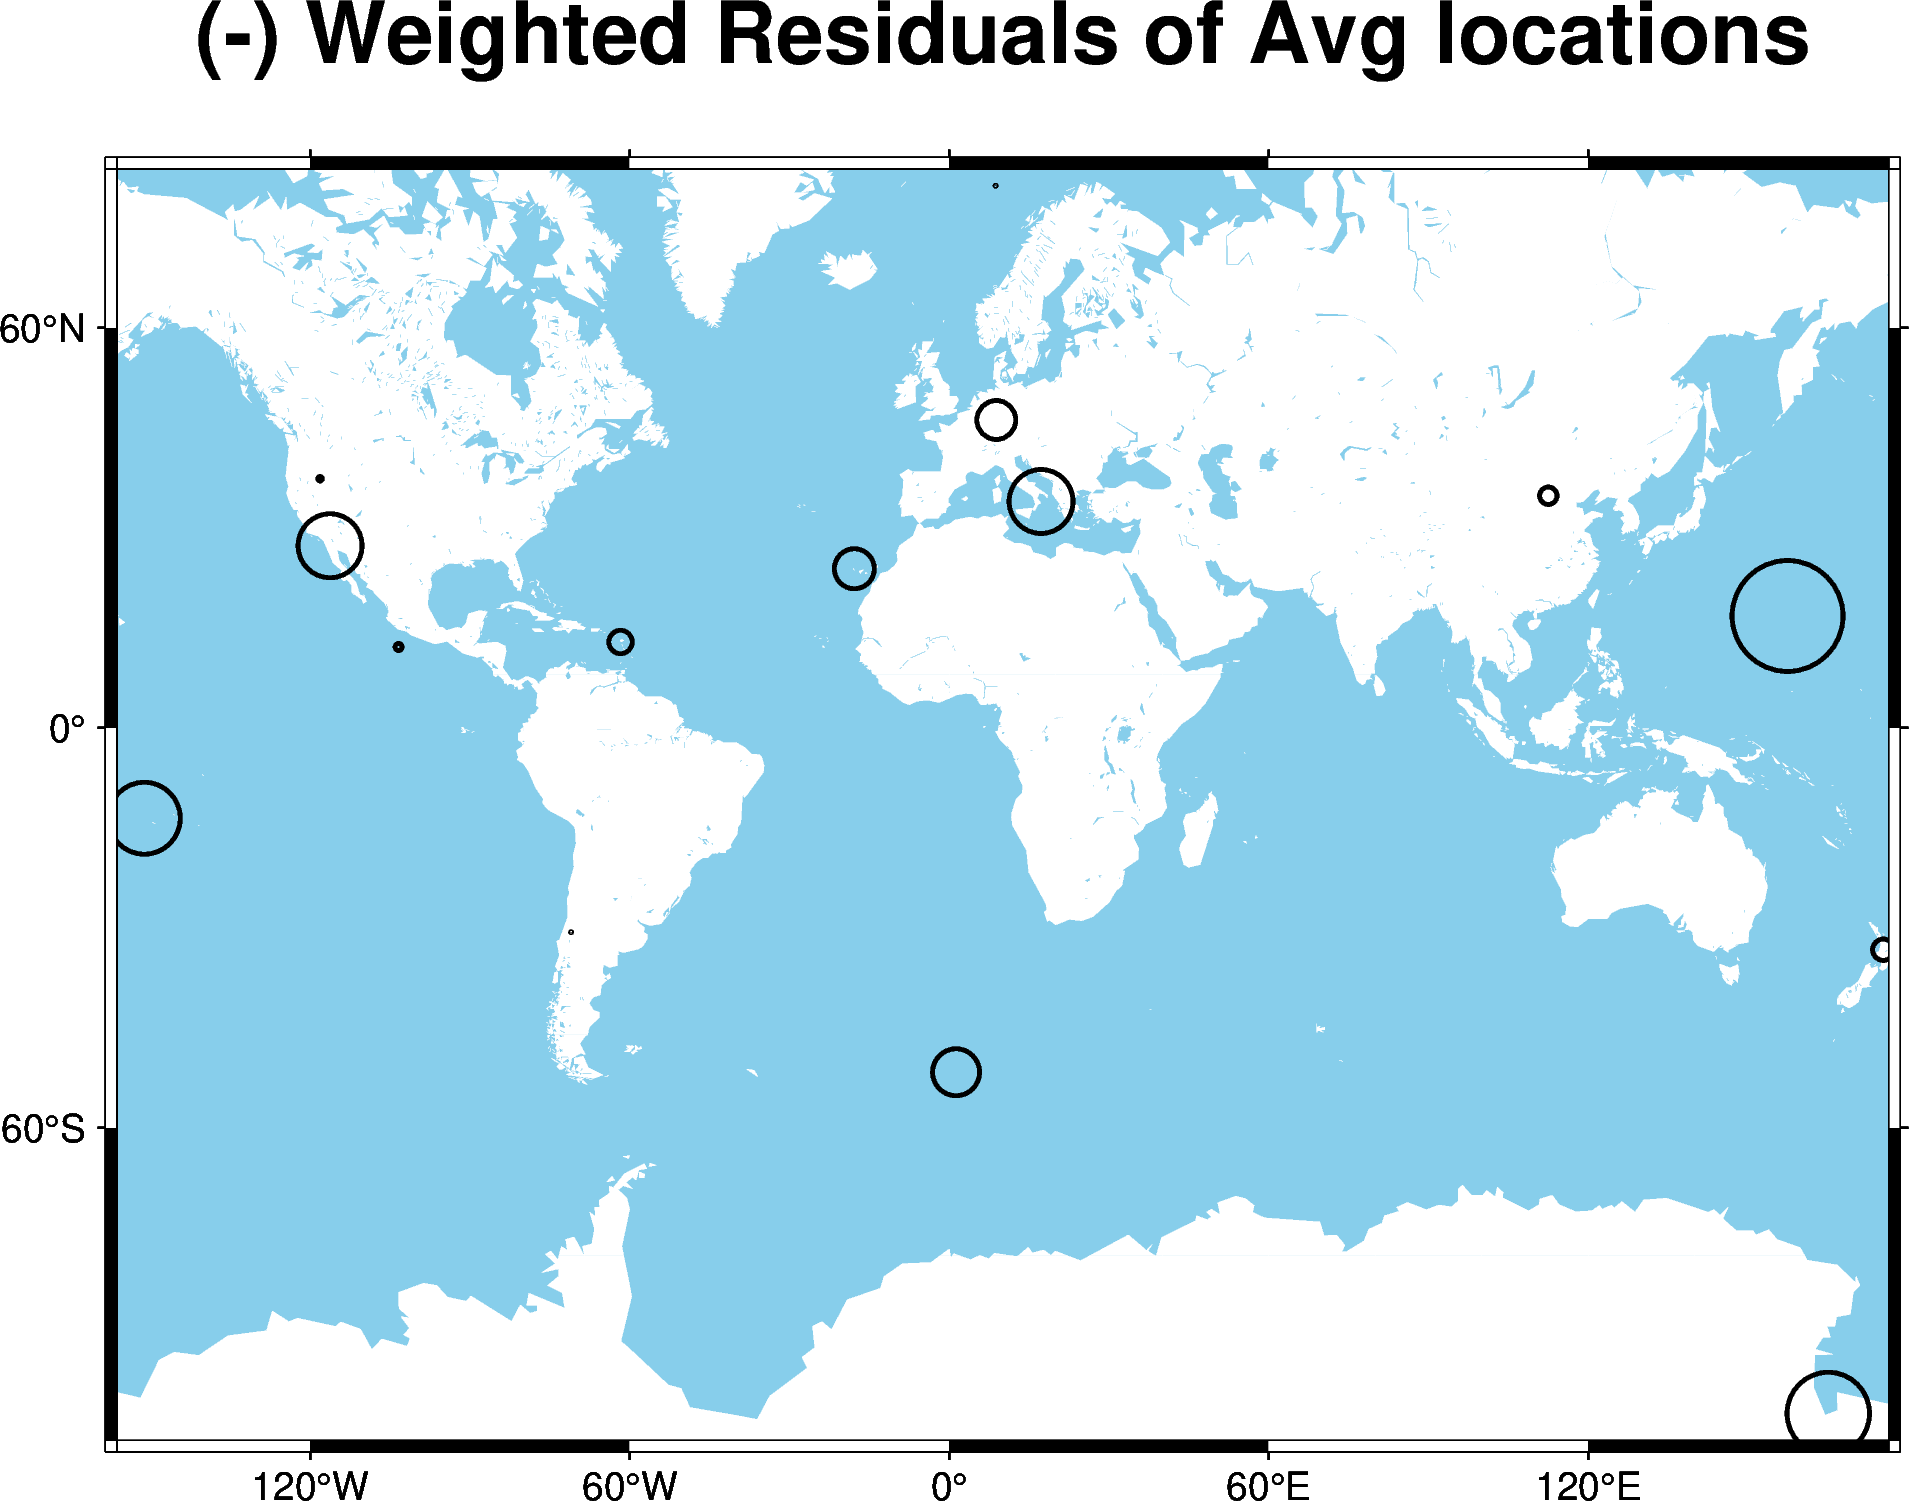

In [6]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="white", water="skyblue")
fig.plot(
   x=RW_neg.AvgLong,
   y=RW_neg.AvgLat, 
   size=0.02 * (5* RW_neg.RW_rd_abs),
   style="cc",
   pen="1p,black",
)
fig.basemap(frame=["a", '+t"(-) Weighted Residuals of Avg locations"'])

fig.show()

#fig.savefig('../figs/' + 'residualscaling_negative.png', dpi=160)

#### Plot all the weighted residuals together 

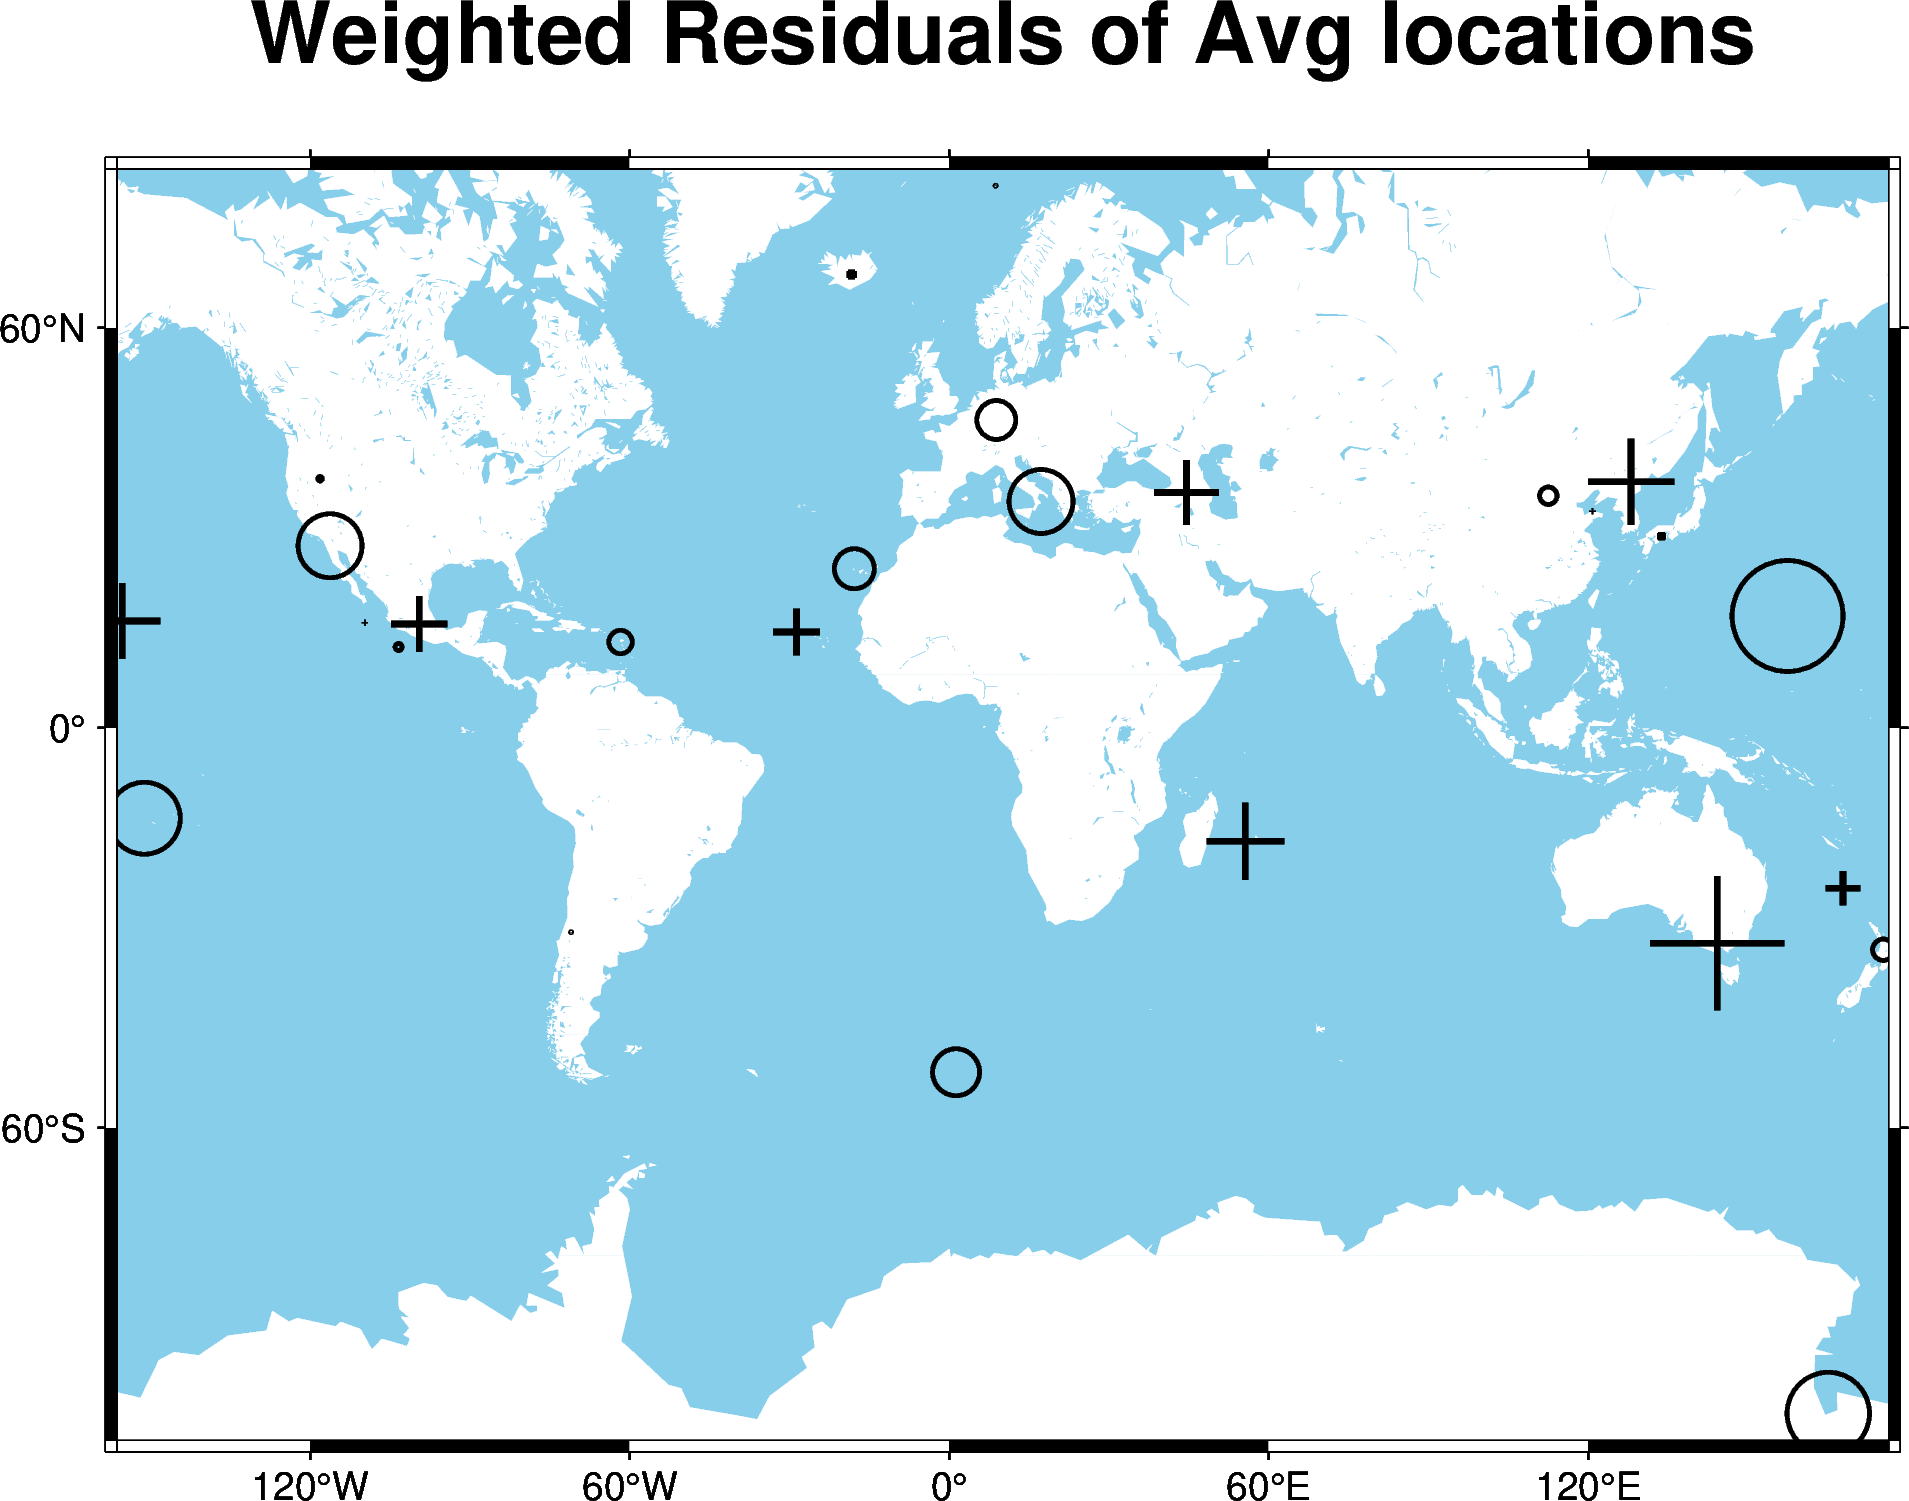

In [7]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="white", water="skyblue")

fig.plot(
   x=RW_neg.AvgLong,
   y=RW_neg.AvgLat, 
   size=0.02 * (5* RW_neg.RW_rd_abs),
   style="cc",
   pen="1p,black") 

fig.plot(
   x=RW_pos.AvgLong,
   y=RW_pos.AvgLat, 
   size=0.02 * (7* RW_pos.RW_rd),
   style="+cc",
   pen="1.5p,black")

fig.basemap(frame=["a", '+t"Weighted Residuals of Avg locations"'])

fig.show()
fig.savefig('../figs/' + 'PINTresidualscaling_all.png', dpi=160)